## reference 

* https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php
* https://www.youtube.com/watch?v=qMTuMa86NzU
* http://www.oranlooney.com/post/ml-from-scratch-part-5-gmm/

## Mixture of gaussians

* Kmeans algo

    - Assigned each example to only one cluster. What if the clusters are overlapping
    - Used euclidean distance. What if the clusters are non circular in shape
    
* Gaussian Mixture Models

    - Clusters are modeled as gaussians
    - EM algorithms, assigned data to clusters with some probability
    - Gives the probability modeling of X! Hence this is a generative model

### Gaussian Mixture Models
    - Flexible class of probability distributions
    - Explain variations with hidden groups or clusters of data
    - Latent membership z
    - Feature values x are gaussian given z
    
### Expectation Maximisation
    - Compute soft membership probabilities, responsibilities $r_{ic}$
    - Update mixture component parameters
    - Ascent using log likelihood
    
### Selecting the number of clusters
    - PEnalised likelihood or validation data likelihood

In [16]:
import numpy as np
from scipy.stats import norm
np.random.seed(0)
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = np.linspace(-5, 5, num=20)
X0 = X * np.random.rand(len(X)) + 10
X1 = X * np.random.rand(len(X)) - 10
X2 = X * np.random.rand(len(X))
X_tot = np.stack((X0, X1, X2)).flatten()

In [3]:
X_tot

array([  7.25593248,   6.80046862,   7.62067088,   8.13592595,
         8.77363084,   8.47025078,   9.1939183 ,   8.82661447,
         9.23921361,   9.89909434,  10.20834869,  10.41754862,
        10.74742705,  11.70504644,  10.1682433 ,  10.25221639,
        10.0691682 ,  13.28665729,  13.48122757,  14.35006074,
       -14.89309171, -13.57518305, -11.82162906, -12.67023139,
       -10.34237334, -11.51560242, -10.26407185, -11.24298542,
       -10.41198552, -10.10912156,  -9.9303801 ,  -9.38876288,
        -9.39980219,  -8.95288483,  -9.95549784,  -8.21210777,
        -7.90598832,  -7.56473422,  -5.77796912,  -6.5908985 ,
        -1.7975395 ,  -1.95514295,  -2.75380735,  -0.20603451,
        -1.93011418,  -1.58835285,  -0.38754682,  -0.16963987,
        -0.24902238,  -0.09571336,   0.15005178,   0.34626435,
         1.30049189,   0.18797728,   0.49470811,   0.4669486 ,
         2.23431796,   0.99983527,   2.08612714,   1.22212796])

In [4]:
# create the array r with dimensionality n x k
r = np.zeros((len(X_tot), 3))
print('Dimensionality','=',np.shape(r))

Dimensionality = (60, 3)


In [6]:
gauss1 = norm(loc=-5, scale=5)
gauss2 = norm(loc = 8, scale = 3)
gauss3 = norm(loc=1.5, scale=1)


In [7]:
# instantiate the random probabilities p_ic
pi = np.array([1/3, 1/3, 1/3])

In [9]:
# probability of each datapoint belongs to gaussian g
for c, g, p in zip(range(3), [gauss1, gauss2, gauss3], pi):
    # write the probabilities that x belongs to gaussian c of column c
    # therefore we get a 60x3 array filled with. probabilities that each x_i belongs to one of the gaussians
    r[:, c] = p * g.pdf(X_tot)

In [10]:
r

array([[1.31865058e-03, 4.29842851e-02, 8.50229099e-09],
       [1.64172144e-03, 4.09214608e-02, 1.05449398e-07],
       [1.09981268e-03, 4.39739867e-02, 9.74733655e-10],
       [8.43424855e-04, 4.42814446e-02, 3.64416980e-11],
       [5.98402552e-04, 4.28772726e-02, 4.31977173e-13],
       [7.05967145e-04, 4.37856810e-02, 3.74818713e-12],
       [4.73037891e-04, 4.09520147e-02, 1.85976682e-14],
       [5.81154399e-04, 4.26757793e-02, 2.93414345e-13],
       [4.61009080e-04, 4.07020418e-02, 1.31117913e-14],
       [3.13833184e-04, 3.62785901e-02, 6.38532837e-17],
       [2.60510827e-04, 3.38066867e-02, 4.53267540e-18],
       [2.29179540e-04, 3.20371263e-02, 7.17232050e-19],
       [1.86586072e-04, 2.91437094e-02, 3.58478134e-20],
       [1.00218249e-04, 2.06757300e-02, 3.23168929e-24],
       [2.66936214e-04, 3.41379614e-02, 6.42219484e-18],
       [2.53640960e-04, 3.34411707e-02, 3.09050636e-18],
       [2.83418674e-04, 3.49435340e-02, 1.50843686e-17],
       [3.31315212e-05, 9.38285

In [11]:
# normalise the probabilities so that each. row of r sums to 1 and weight it by pi_c == fraction of 
# points belonging to cluster c
for i in range(len(r)):
    r[i] = r[i] / (np.sum(pi) * np.sum(r, axis=1)[i])

In the last calculation, we normalised the probabilities r_ic. So each row i in r gives us the probabilities x_i
to belong to one gaussian, one col per gaussian. Since we want to know the probabilities that x_i belongs to
gaussian g, we have to do smth, like a simple percentage where we want to know how likely it is in the percentage
x_i belongs to gaussian g. 

In [12]:
print(r)
print(np.sum(r,axis=1)) # As we can see, as result each row sums up to one, just as we want it.

[[2.97644006e-02 9.70235407e-01 1.91912550e-07]
 [3.85713024e-02 9.61426220e-01 2.47747304e-06]
 [2.44002651e-02 9.75599713e-01 2.16252823e-08]
 [1.86909096e-02 9.81309090e-01 8.07574590e-10]
 [1.37640773e-02 9.86235923e-01 9.93606589e-12]
 [1.58674083e-02 9.84132592e-01 8.42447356e-11]
 [1.14191259e-02 9.88580874e-01 4.48947365e-13]
 [1.34349421e-02 9.86565058e-01 6.78305927e-12]
 [1.11995848e-02 9.88800415e-01 3.18533028e-13]
 [8.57645259e-03 9.91423547e-01 1.74498648e-15]
 [7.64696969e-03 9.92353030e-01 1.33051021e-16]
 [7.10275112e-03 9.92897249e-01 2.22285146e-17]
 [6.36154765e-03 9.93638452e-01 1.22221112e-18]
 [4.82376290e-03 9.95176237e-01 1.55549544e-22]
 [7.75866904e-03 9.92241331e-01 1.86665135e-16]
 [7.52759691e-03 9.92472403e-01 9.17205413e-17]
 [8.04550643e-03 9.91954494e-01 4.28205323e-16]
 [3.51864573e-03 9.96481354e-01 9.60903037e-30]
 [3.42631418e-03 9.96573686e-01 1.06921949e-30]
 [3.14390460e-03 9.96856095e-01 3.91217273e-35]
 [1.00000000e+00 2.67245688e-12 1.564436

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

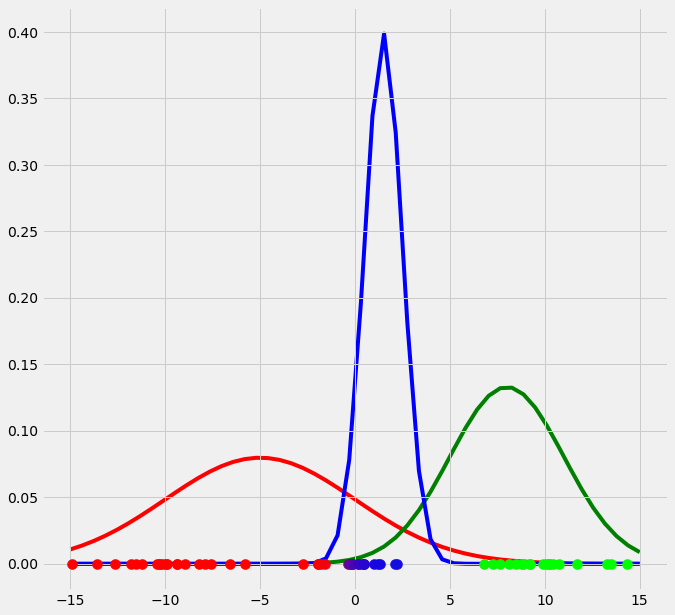

In [17]:
"""Plot the data"""

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


for i in range(len(r)):
    ax0.scatter(X_tot[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) # We have defined the first column as red, the second as
                                                                        # green and the third as blue



for g,c in zip(
        [gauss1.pdf(np.linspace(-15,15)),
         gauss2.pdf(np.linspace(-15,15)),
         gauss3.pdf(np.linspace(-15,15))],
        ['r','g','b']):
    ax0.plot(np.linspace(-15,15),g,c=c,zorder=0)

    
    
plt.show()

In [20]:
# m step

m_c = []
for c in range(len(r[0])):
    m = np.sum(r[:, c])
    m_c.append(m) # for each cluster, calculate the m_c and add it to the list

In [21]:
# calculate p_ic

p_ic = []
for m in m_c:
    normalised = m / np.sum(m_c)
    p_ic.append(normalised) # for each cluster calculate the fraction of points p_ic which belong to cluster c

In [26]:
# calculate mu_c

mu_c = np.sum(X_tot.reshape(len(X_tot), 1) * r, axis=0) / m_c

In [ ]:
# calculate variance, var_c

var_c = []
for c in range(len(r[0])):
    

### from the last resource

E step
* given a centroid and a covariance matrix, we update the weights by calculating the probability of X that comes from each class and then normaliseing
* the conditional probability is the multivariate normal distribution
* the probability phi can be estimated by averaging across all samples in the dataset.

M step
    * now that we have the weights we can be using the formulas to directly estimate the means and the sigmas.
    
http://www.oranlooney.com/post/ml-from-scratch-part-5-gmm/

In [1]:
import numpy as np
from scipy.stats import multivariate_normal

In [52]:
class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)
        
    def initialise(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape
        
        # fill value is 1/self.k because we are assuming equal probabilities in the start
        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full(shape=self.k, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [X[row_index] for row_index in random_row]
        self.sigma = [np.cov(X.T) for _ in range(self.k)]
        
    def e_step(self, X):
        # e - step: Updating weights and phi holding mu and sigma as constant
        self.weights = self.predict_prob(X)
        self.phi = self.weights.mean(axis=0)
        
    def m_step(self, X):
        # updating mu and sigma holding phi and weights as constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T, aweights=(weight/total_weight).flatten(), bias=True)
    
    def fit(self, X):
        self.initialise(X)
        
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
            
    def predict_prob(self, X):
        likelihood = np.zeros((self.n, self.k))
        for i in range(self.k):
            distribution = multivariate_normal(mean=self.mu[i], cov=self.sigma[i])
            likelihood[:, i] = distribution.pdf(X)
            
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_prob(X)
        return np.argmax(weights, axis=1)

In [13]:
likelihood = np.zeros((gmm.n, gmm.k))
for i in range(gmm.k):
    print(i)

0
1
2


In [55]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

In [56]:
np.random.seed(42)
gmm = GMM(k=3, max_iter=10)
gmm.fit(X)

In [57]:
permutation = np.array([
    mode(iris.target[gmm.predict(X) == i]).mode.item() 
    for i in range(gmm.k)])
permuted_prediction = permutation[gmm.predict(X)]
print(np.mean(iris.target == permuted_prediction))
confusion_matrix(iris.target, permuted_prediction)

0.96


array([[50,  0,  0],
       [ 0, 44,  6],
       [ 0,  0, 50]])

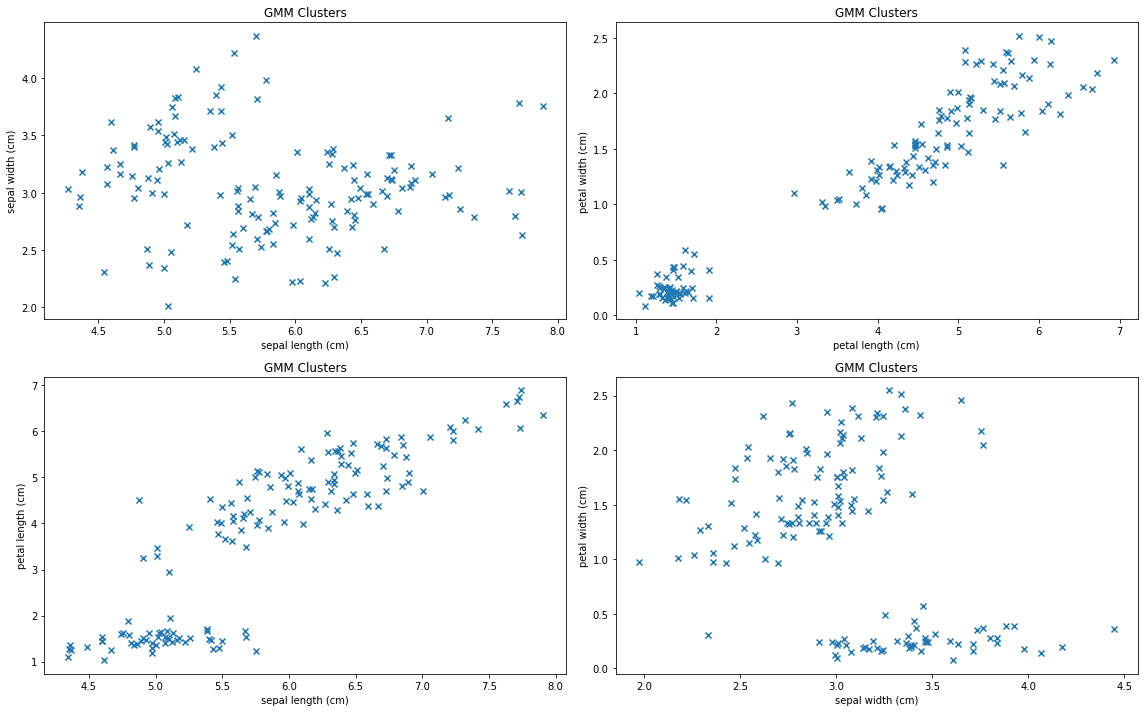

In [58]:
def jitter(x):
    return x + np.random.uniform(low=-0.05, high=0.05, size=x.shape)

def plot_axis_pairs(X, axis_pairs, clusters, classes):
    n_rows = len(axis_pairs) // 2
    n_cols = 2
    plt.figure(figsize=(16, 10))
    for index, (x_axis, y_axis) in enumerate(axis_pairs):
        plt.subplot(n_rows, n_cols, index+1)
        plt.title('GMM Clusters')
        plt.xlabel(iris.feature_names[x_axis])
        plt.ylabel(iris.feature_names[y_axis])
        plt.scatter(
            jitter(X[:, x_axis]), 
            jitter(X[:, y_axis]), 
            #c=clusters, 
            cmap=plt.cm.get_cmap('brg'),
            marker='x')
    plt.tight_layout()
    
plot_axis_pairs(
    X=X,
    axis_pairs=[ 
        (0,1), (2,3), 
        (0,2), (1,3) ],
    clusters=permuted_prediction,
    classes=iris.target)

In [59]:
permutation = np.array([
    mode(iris.target[gmm.predict(X) == i]).mode.item() 
    for i in range(gmm.k)])
permuted_prediction = permutation[gmm.predict(X)]
print(np.mean(iris.target == permuted_prediction))
confusion_matrix(iris.target, permuted_prediction)

0.96


array([[50,  0,  0],
       [ 0, 44,  6],
       [ 0,  0, 50]])